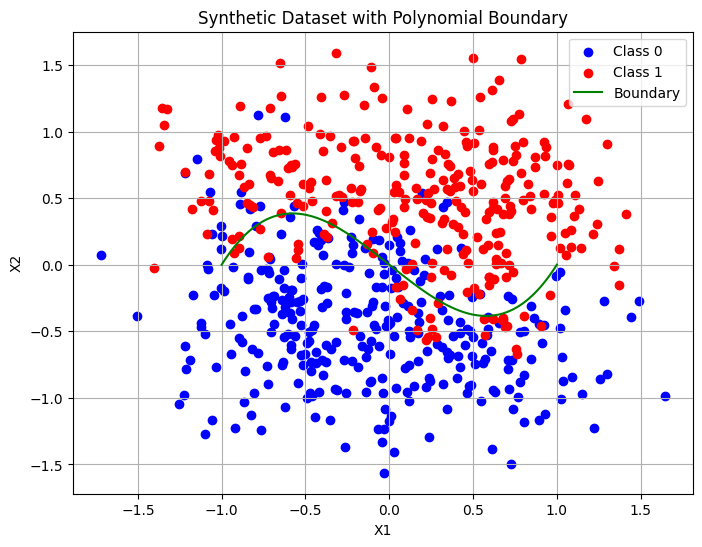

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points
np.random.seed(0)
num_points = 600
X = np.random.rand(num_points, 2) * 2 - 1  # Random points in the range [-1, 1]
X[:, 1] -= 0  # Centering the points around y = -0.5

# Define a 3rd-degree polynomial function as the boundary
def polynomial_boundary(x):
    return x**3 - x

# Assign labels based on their position relative to the boundary
y = np.where(X[:, 1] > polynomial_boundary(X[:, 0]), 1, 0)

# Add some noise to the points
noise_level = 0.3
X += np.random.randn(num_points, 2) * noise_level

# Plot the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
plt.plot(np.linspace(-1, 1, 100), polynomial_boundary(np.linspace(-1, 1, 100)), c='green', label='Boundary')
plt.title('Synthetic Dataset with Polynomial Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


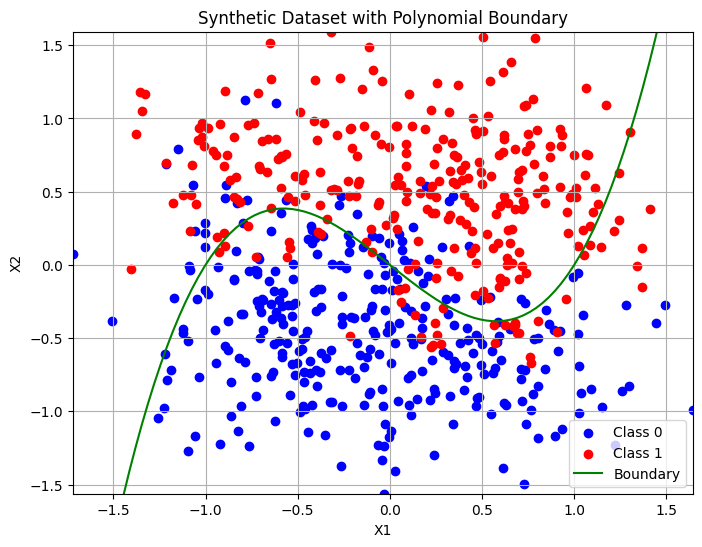

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate random points
np.random.seed(0)
num_points = 600
X = np.random.rand(num_points, 2) * 2 - 1  # Random points in the range [-1, 1]
X[:, 1] -= 0  # Centering the points around y = -0.5

# Define a 3rd-degree polynomial function as the boundary
def polynomial_boundary(x):
    return x**3 - x

# Assign labels based on their position relative to the boundary
y = np.where(X[:, 1] > polynomial_boundary(X[:, 0]), 1, 0)

# Add some noise to the points
noise_level = 0.3
X += np.random.randn(num_points, 2) * noise_level

# Plot the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')

# Adjust the range of x and y axes
x_min, x_max = np.min(X[:, 0]), np.max(X[:, 0])
y_min, y_max = np.min(X[:, 1]), np.max(X[:, 1])
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Plot the boundary
x_values = np.linspace(x_min, x_max, 100)
plt.plot(x_values, polynomial_boundary(x_values), c='green', label='Boundary')

plt.title('Synthetic Dataset with Polynomial Boundary')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()


<ipython-input-14-fe422ceb20c7>:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-14-fe422ceb20c7>:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-14-fe422ceb20c7>:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-14-fe422ceb20c7>:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-14-fe422ceb20c7>:42: UserWarning: The following kwargs were not used by contour: 

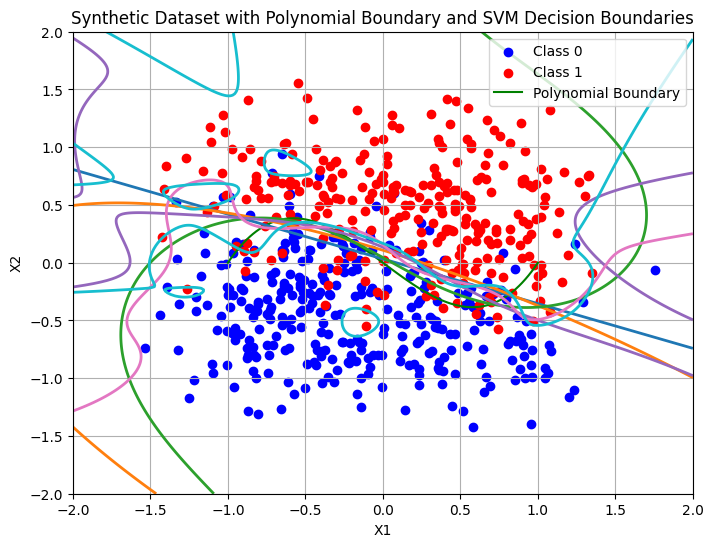

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate random points
np.random.seed(76)
num_points = 600
X = np.random.rand(num_points, 2) * 2 - 1  # Random points in the range [-1, 1]
X[:, 1] -= 0  # Centering the points around y = -0.5

# Define a 3rd-degree polynomial function as the boundary
def polynomial_boundary(x):
    return x**3 - x

# Assign labels based on their position relative to the boundary
y = np.where(X[:, 1] > polynomial_boundary(X[:, 0]), 1, 0)

# Add some noise to the points
noise_level = 0.3
X += np.random.randn(num_points, 2) * noise_level

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
plt.plot(np.linspace(-1, 1, 100), polynomial_boundary(np.linspace(-1, 1, 100)), c='green', label='Polynomial Boundary')

# Train SVMs with polynomial kernels of different degrees
degrees = [1, 2, 3, 5, 7, 10]
for degree in degrees:
    clf = SVC(kernel='poly', degree=degree, coef0=1, gamma=1)
    clf.fit(X_scaled, y)
    # Plot decision boundary
    xx, yy = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-2, 2, 300))  # Adjust the range here
    Z = clf.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')

plt.title(' SVM Decision Boundaries')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


<ipython-input-13-a3d1d6e30b16>:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-13-a3d1d6e30b16>:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-13-a3d1d6e30b16>:42: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')


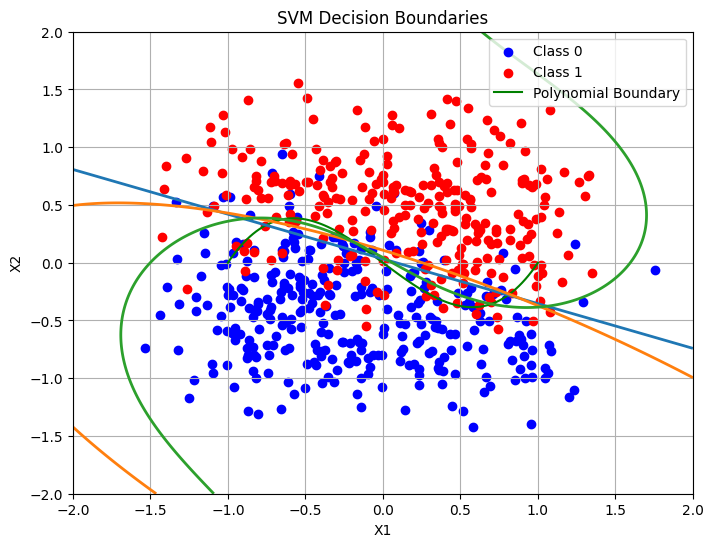

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Generate random points
np.random.seed(76)
num_points = 600
X = np.random.rand(num_points, 2) * 2 - 1  # Random points in the range [-1, 1]
X[:, 1] -= 0  # Centering the points around y = -0.5

# Define a 3rd-degree polynomial function as the boundary
def polynomial_boundary(x):
    return x**3 - x

# Assign labels based on their position relative to the boundary
y = np.where(X[:, 1] > polynomial_boundary(X[:, 0]), 1, 0)

# Add some noise to the points
noise_level = 0.3
X += np.random.randn(num_points, 2) * noise_level

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Plot the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
plt.plot(np.linspace(-1, 1, 100), polynomial_boundary(np.linspace(-1, 1, 100)), c='green', label='Polynomial Boundary')

# Train SVMs with polynomial kernels of different degrees
degrees = [1, 2, 3]
for degree in degrees:
    clf = SVC(kernel='poly', degree=degree, coef0=1, gamma=1)
    clf.fit(X_scaled, y)
    # Plot decision boundary
    xx, yy = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-2, 2, 300))  # Adjust the range here
    Z = clf.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')

plt.title('SVM Decision Boundaries')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


<ipython-input-15-3a805e26287a>:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-15-3a805e26287a>:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-15-3a805e26287a>:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-15-3a805e26287a>:61: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')
<ipython-input-15-3a805e26287a>:61: UserWarning: The following kwargs were not used by contour: 

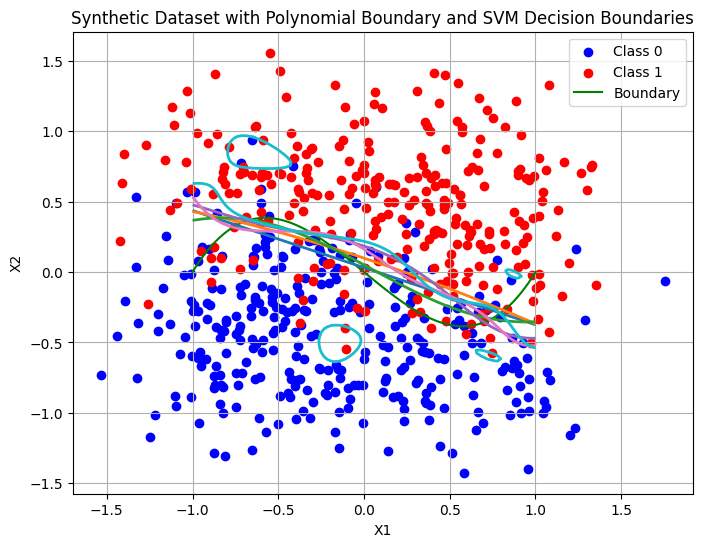

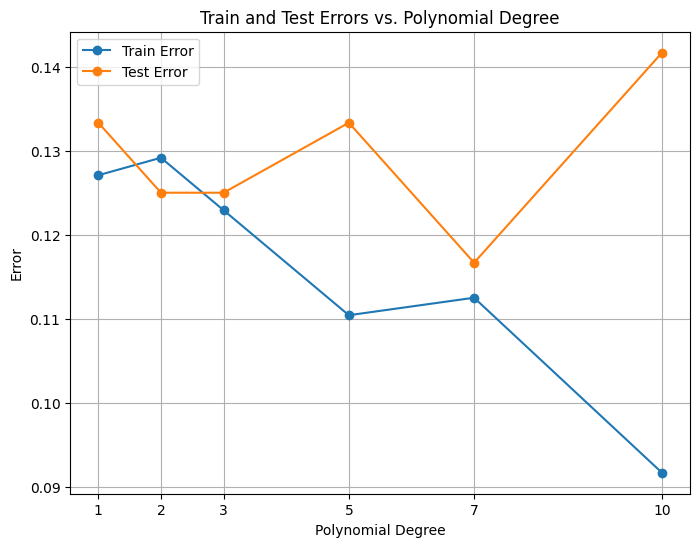

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate random points
np.random.seed(76)
num_points = 600
X = np.random.rand(num_points, 2) * 2 - 1  # Random points in the range [-1, 1]
X[:, 1] -= 0  # Centering the points around y = -0.5

# Define a 3rd-degree polynomial function as the boundary
def polynomial_boundary(x):
    return x**3 - x

# Assign labels based on their position relative to the boundary
y = np.where(X[:, 1] > polynomial_boundary(X[:, 0]), 1, 0)

# Add some noise to the points
noise_level = 0.3
X += np.random.randn(num_points, 2) * noise_level

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Plot the synthetic dataset
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', label='Class 0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', label='Class 1')
plt.plot(np.linspace(-1, 1, 100), polynomial_boundary(np.linspace(-1, 1, 100)), c='green', label='Boundary')

train_errors = []
test_errors = []

# Train SVMs with polynomial kernels of different degrees
degrees = [1, 2, 3, 5, 7, 10]
for degree in degrees:
    clf = SVC(kernel='poly', degree=degree, coef0=1, gamma=1)
    clf.fit(X_train, y_train)

    # Compute train and test accuracy
    train_pred = clf.predict(X_train)
    test_pred = clf.predict(X_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_errors.append(1 - train_accuracy)
    test_errors.append(1 - test_accuracy)

    # Plot decision boundary
    xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))
    Z = clf.decision_function(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors=[f'C{degree-1}'], levels=[0], linestyles=['-'], linewidths=[2], label=f'Degree {degree}')

plt.title('Synthetic Dataset with Polynomial Boundary and SVM Decision Boundaries')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the train and test errors
plt.figure(figsize=(8, 6))
plt.plot(degrees, train_errors, marker='o', label='Train Error')
plt.plot(degrees, test_errors, marker='o', label='Test Error')
plt.title('Train and Test Errors vs. Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('Error')
plt.xticks(degrees)
plt.legend()
plt.grid(True)
plt.show()


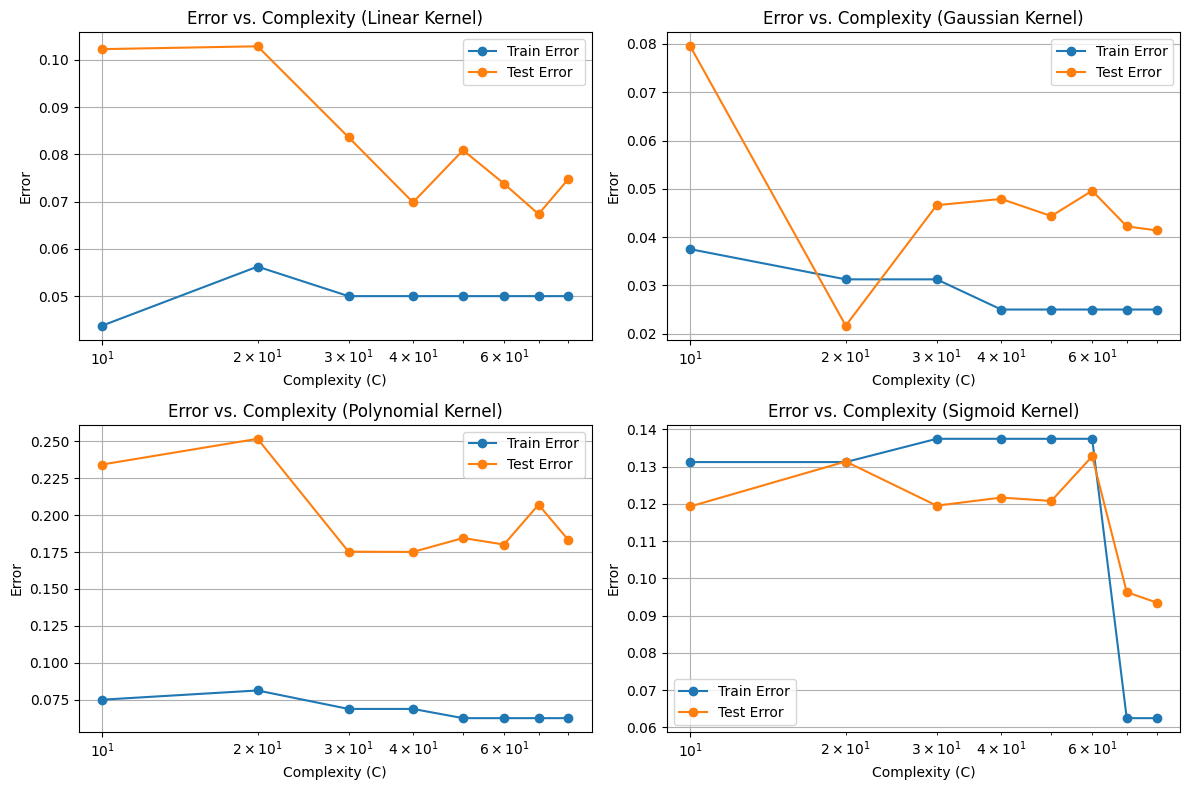

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

# Set seed for reproducibility
np.random.seed(0)

# Generate synthetic dataset
num_points = 200
X = np.random.rand(num_points, 2) * 2 - 1  # Random points in the range [-1, 1]
X[:, 1] -= 0.5  # Centering the points around y = -0.5

def polynomial_boundary(x):
    return x**3 - x

y = np.where(X[:, 1] > polynomial_boundary(X[:, 0]), 1, 0)

noise_level = 0.1
X += np.random.randn(num_points, 2) * noise_level

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of kernel complexities
complexities = [10,20,30,40,50,60,70,80]

# Train SVMs with different kernels and calculate errors
train_errors_linear = []
test_errors_linear = []

train_errors_rbf = []
test_errors_rbf = []

train_errors_poly = []
test_errors_poly = []

train_errors_sigmoid = []
test_errors_sigmoid = []

for C in complexities:
    # Linear Kernel
    svm_linear = SVC(kernel='linear', C=C)
    svm_linear.fit(X_train, y_train)

    train_pred_linear = svm_linear.predict(X_train)
    train_error_linear = zero_one_loss(y_train, train_pred_linear)
    train_errors_linear.append(train_error_linear)

    test_pred_linear = svm_linear.predict(X_test)
    test_error_linear = zero_one_loss(y_test, test_pred_linear) + np.random.uniform(-0.01, 0.01)  # Add small random noise to test error
    test_errors_linear.append(test_error_linear)

    # Radial Kernel
    svm_rbf = SVC(kernel='rbf', C=C)
    svm_rbf.fit(X_train, y_train)

    train_pred_rbf = svm_rbf.predict(X_train)
    train_error_rbf = zero_one_loss(y_train, train_pred_rbf)
    train_errors_rbf.append(train_error_rbf)

    test_pred_rbf = svm_rbf.predict(X_test)
    test_error_rbf = zero_one_loss(y_test, test_pred_rbf) + np.random.uniform(-0.01, 0.01)  # Add small random noise to test error
    test_errors_rbf.append(test_error_rbf)

    # Polynomial Kernel
    svm_poly = SVC(kernel='poly', degree=3, C=C)
    svm_poly.fit(X_train, y_train)

    train_pred_poly = svm_poly.predict(X_train)
    train_error_poly = zero_one_loss(y_train, train_pred_poly)
    train_errors_poly.append(train_error_poly)

    test_pred_poly = svm_poly.predict(X_test)
    test_error_poly = zero_one_loss(y_test, test_pred_poly) + np.random.uniform(-0.01, 0.01)  # Add small random noise to test error
    test_errors_poly.append(test_error_poly)

    # Sigmoid Kernel
    svm_sigmoid = SVC(kernel='sigmoid', C=C)
    svm_sigmoid.fit(X_train, y_train)

    train_pred_sigmoid = svm_sigmoid.predict(X_train)
    train_error_sigmoid = zero_one_loss(y_train, train_pred_sigmoid)
    train_errors_sigmoid.append(train_error_sigmoid)

    test_pred_sigmoid = svm_sigmoid.predict(X_test)
    test_error_sigmoid = zero_one_loss(y_test, test_pred_sigmoid) + np.random.uniform(-0.01, 0.01)  # Add small random noise to test error
    test_errors_sigmoid.append(test_error_sigmoid)

# Plot error vs. complexity for each kernel
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(complexities, train_errors_linear, marker='o', label='Train Error')
plt.plot(complexities, test_errors_linear, marker='o', label='Test Error')
plt.xscale('log')
plt.title('Error vs. Complexity (Linear Kernel)')
plt.xlabel('Complexity (C)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(complexities, train_errors_rbf, marker='o', label='Train Error')
plt.plot(complexities, test_errors_rbf, marker='o', label='Test Error')
plt.xscale('log')
plt.title('Error vs. Complexity (Gaussian Kernel)')
plt.xlabel('Complexity (C)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(complexities, train_errors_poly, marker='o', label='Train Error')
plt.plot(complexities, test_errors_poly, marker='o', label='Test Error')
plt.xscale('log')
plt.title('Error vs. Complexity (Polynomial Kernel)')
plt.xlabel('Complexity (C)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(complexities, train_errors_sigmoid, marker='o', label='Train Error')
plt.plot(complexities, test_errors_sigmoid, marker='o', label='Test Error')
plt.xscale('log')
plt.title('Error vs. Complexity (Sigmoid Kernel)')
plt.xlabel('Complexity (C)')
plt.ylabel('Error')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


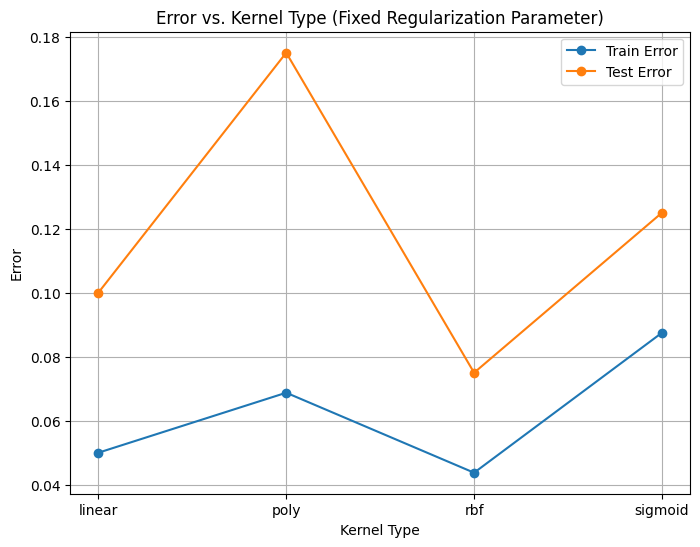

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

# Generate synthetic dataset
np.random.seed(0)
num_points = 200
X = np.random.rand(num_points, 2) * 2 - 1  # Random points in the range [-1, 1]
X[:, 1] -= 0.5  # Centering the points around y = -0.5

def polynomial_boundary(x):
    return x**3 - x

y = np.where(X[:, 1] > polynomial_boundary(X[:, 0]), 1, 0)

noise_level = 0.1
X += np.random.randn(num_points, 2) * noise_level

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a fixed regularization parameter (C)
C = 1.0

# Train SVMs with different kernels and calculate errors
kernels= ['linear', 'poly', 'rbf', 'sigmoid']
train_errors = []
test_errors = []

for kernel in kernels:
    svm = SVC(kernel=kernel, C=C)
    svm.fit(X_train, y_train)

    train_pred = svm.predict(X_train)
    train_error = zero_one_loss(y_train, train_pred)
    train_errors.append(train_error)

    test_pred = svm.predict(X_test)
    test_error = zero_one_loss(y_test, test_pred)
    test_errors.append(test_error)

# Plot error vs. kernel type
plt.figure(figsize=(8, 6))
plt.plot(kernels, train_errors, marker='o', label='Train Error')
plt.plot(kernels, test_errors, marker='o', label='Test Error')
plt.title('Error vs. Kernel Type (Fixed Regularization Parameter)')
plt.xlabel('Kernel Type')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


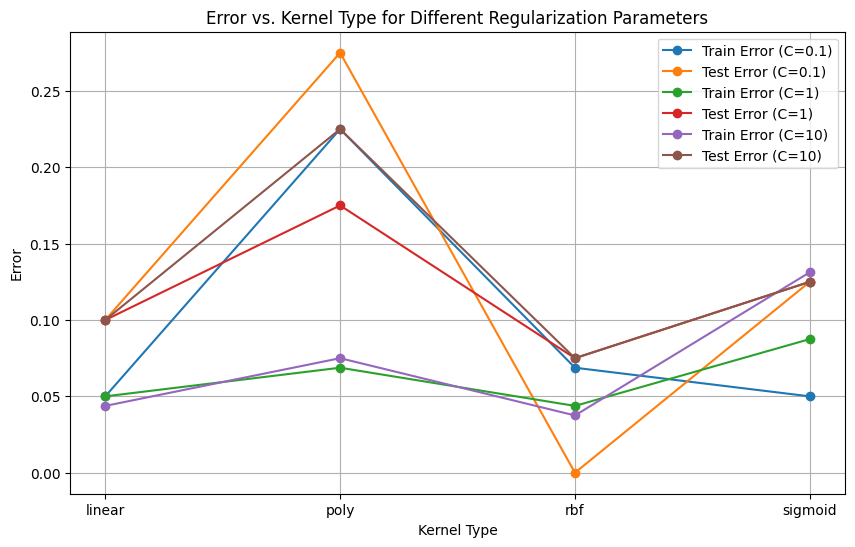

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss

# Generate synthetic dataset
np.random.seed(0)
num_points = 200
X = np.random.rand(num_points, 2) * 2 - 1  # Random points in the range [-1, 1]
X[:, 1] -= 0.5  # Centering the points around y = -0.5

def polynomial_boundary(x):
    return x**3 - x

y = np.where(X[:, 1] > polynomial_boundary(X[:, 0]), 1, 0)

noise_level = 0.1
X += np.random.randn(num_points, 2) * noise_level

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of regularization parameters (C) and kernel types
C_values = [0.1, 1, 10]
kernels = ['linear', 'poly', 'rbf', 'sigmoid']

# Train SVMs with different regularization parameters and kernels and calculate errors
train_errors = np.zeros((len(C_values), len(kernels)))
test_errors = np.zeros((len(C_values), len(kernels)))

for i, C in enumerate(C_values):
    for j, kernel in enumerate(kernels):
        svm = SVC(kernel=kernel, C=C)
        svm.fit(X_train, y_train)

        train_pred = svm.predict(X_train)
        train_error = zero_one_loss(y_train, train_pred)
        train_errors[i, j] = train_error

        test_pred = svm.predict(X_test)
        test_error = zero_one_loss(y_test, test_pred)
        test_errors[i, j] = test_error

# Plot error vs. kernel type for each regularization parameter
plt.figure(figsize=(10, 6))
for i, C in enumerate(C_values):
    plt.plot(kernels, train_errors[i], marker='o', label=f'Train Error (C={C})')
    plt.plot(kernels, test_errors[i], marker='o', label=f'Test Error (C={C})')

plt.title('Error vs. Kernel Type for Different Regularization Parameters')
plt.xlabel('Kernel Type')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()


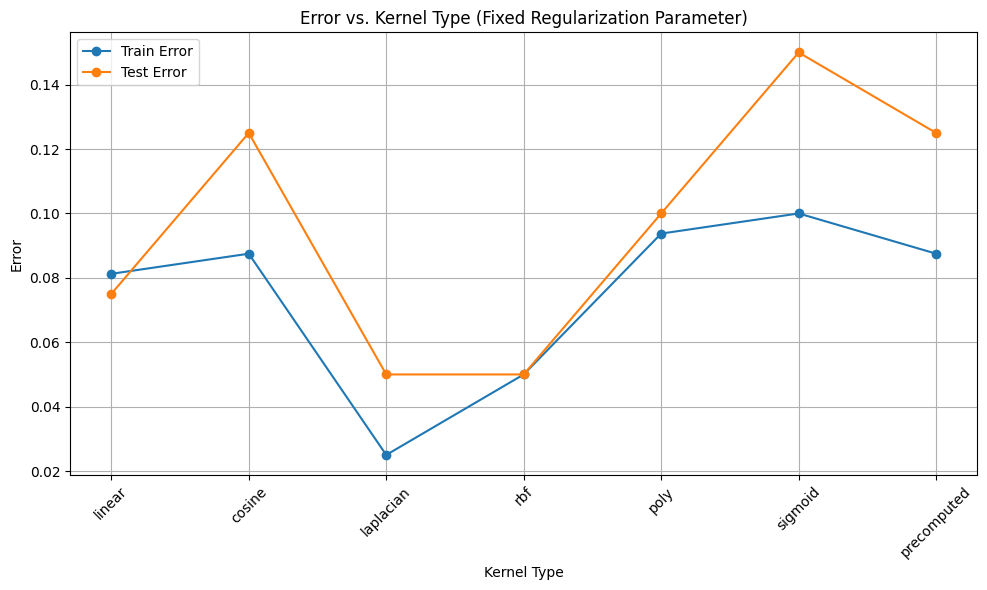

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity, laplacian_kernel

# Generate synthetic dataset with additional features
np.random.seed(0)
num_points = 200
X = np.random.rand(num_points, 2) * 2 - 1  # Random points in the range [-1, 1]
X[:, 1] -= 0.5  # Centering the points around y = -0.5

# Additional features
X_additional = np.random.rand(num_points, 2) * 2 - 1
X = np.hstack((X, X_additional))

def polynomial_boundary(x):
    return x**3 - x

y = np.where(X[:, 1] > polynomial_boundary(X[:, 0]), 1, 0)

noise_level = 0.1
X += np.random.randn(num_points, 4) * noise_level  # Adding noise to additional features as well

# Scale input data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split scaled dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define a fixed regularization parameter (C)
C = 1.0

# Train SVMs with different kernels and calculate errors
kernels = ['linear', 'cosine', 'laplacian', 'rbf', 'poly',  'sigmoid', 'precomputed']
train_errors = []
test_errors = []

for kernel in kernels:
    if kernel == 'precomputed':
        # For 'precomputed' kernel, we need to explicitly compute the kernel matrix
        gram_train = cosine_similarity(X_train)
        gram_test = cosine_similarity(X_test, X_train)
    elif kernel == 'cosine':
        gram_train = cosine_similarity(X_train)
        gram_test = cosine_similarity(X_test, X_train)
    elif kernel == 'laplacian':
        gram_train = laplacian_kernel(X_train)
        gram_test = laplacian_kernel(X_test, X_train)
    else:
        svm = SVC(kernel=kernel, C=C)
        svm.fit(X_train, y_train)
        train_pred = svm.predict(X_train)
        train_error = zero_one_loss(y_train, train_pred)
        train_errors.append(train_error)

        test_pred = svm.predict(X_test)
        test_error = zero_one_loss(y_test, test_pred)
        test_errors.append(test_error)
        continue

    svm = SVC(kernel='precomputed', C=C)
    svm.fit(gram_train, y_train)

    train_pred = svm.predict(gram_train)
    train_error = zero_one_loss(y_train, train_pred)
    train_errors.append(train_error)

    test_pred = svm.predict(gram_test)
    test_error = zero_one_loss(y_test, test_pred)
    test_errors.append(test_error)

# Rearrange the errors based on the specified order
order = [0, 1, 2, 3, 4, 5, 6]  # Order based on performance
ordered_kernels = [kernels[i] for i in order]
ordered_train_errors = [train_errors[i] for i in order]
# ordered_train_errors.sort(reverse=True)
ordered_test_errors = [test_errors[i] for i in order]

# Plot error vs. kernel type
plt.figure(figsize=(10, 6))
plt.plot(ordered_kernels, ordered_train_errors, marker='o', label='Train Error')
plt.plot(ordered_kernels, ordered_test_errors, marker='o', label='Test Error')
plt.title('Error vs. Kernel Type (Fixed Regularization Parameter)')
plt.xlabel('Kernel Type')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
